<a href="https://colab.research.google.com/github/deepakmelkani/ML-project-Cotton-Plant-Disease-Prediction-/blob/main/Transfer_Learning_Resnet_50.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Transfer Learning VGG 16 and VGG 19 using Keras

In [ ]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [ ]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.resnet50 import ResNet50
#from keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
#import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = '/content/drive/MyDrive/data/train'
valid_path = '/content/drive/MyDrive/data/test'


In [ ]:
# Import the ResNet50 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

resnet = ResNet50(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)




94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
# don't train existing weights
for layer in resnet.layers:
    layer.trainable = False

In [ ]:
  # useful for getting number of output classes
folders = glob('/content/drive/MyDrive/data/train/*')

In [ ]:
# our layers - you can add more if you want
x = Flatten()(resnet.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=resnet.input, outputs=prediction)

In [ ]:

# view the structure of the model
model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)


In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/data/train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 2285 images belonging to 4 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/data/test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 18 images belonging to 4 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=20,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/20
72/72 [==============================] - 418s 6s/step - loss: 3.5168 - accuracy: 0.4013 - val_loss: 1.2143 - val_accuracy: 0.5000
Epoch 2/20
72/72 [==============================] - 43s 600ms/step - loss: 1.1012 - accuracy: 0.5475 - val_loss: 0.8223 - val_accuracy: 0.7222
Epoch 3/20
72/72 [==============================] - 43s 601ms/step - loss: 0.9276 - accuracy: 0.6280 - val_loss: 0.7744 - val_accuracy: 0.6667
Epoch 4/20
72/72 [==============================] - 43s 603ms/step - loss: 0.8213 - accuracy: 0.6591 - val_loss: 0.9842 - val_accuracy: 0.6111
Epoch 5/20
72/72 [==============================] - 43s 595ms/step - loss: 0.8428 - accuracy: 0.6630 - val_loss: 0.8034 - val_accuracy: 0.6111
Epoch 6/20
72/72 [==============================] - 43s 603ms/step - loss: 0.8048 - accuracy: 0.6893 - val_loss: 0.9475 - val_accuracy: 0.7222
Epoch 7/20
72/72 [==============================] - 43s 595ms/step - loss: 0.8227 - accuracy: 0.6775 - val_loss: 0.8602 - val_accuracy: 0.7778
E

In [ ]:
import matplotlib.pyplot as plt

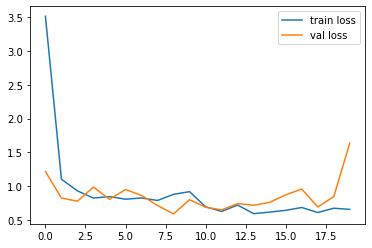

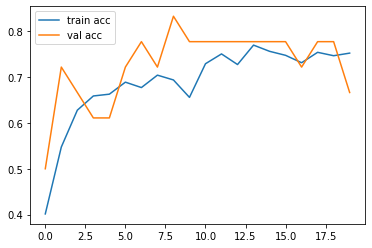

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [ ]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_resnet50.h5')

In [ ]:

y_pred = model.predict(test_set)


In [ ]:
y_pred

array([[8.15264016e-08, 6.19050411e-07, 9.99999166e-01, 1.46293800e-07],
       [5.18450577e-07, 9.64757383e-01, 2.88343504e-02, 6.40769163e-03],
       [7.57438841e-07, 3.92695802e-04, 9.99587834e-01, 1.86495108e-05],
       [3.58497404e-04, 9.46214855e-01, 3.09113953e-02, 2.25152783e-02],
       [1.53357587e-06, 2.58085201e-04, 5.41012920e-02, 9.45639074e-01],
       [5.92330650e-07, 9.85300601e-01, 7.75733497e-05, 1.46212038e-02],
       [1.25061649e-06, 5.48817813e-01, 8.26634318e-02, 3.68517548e-01],
       [9.08426216e-07, 2.97493219e-01, 2.33000237e-02, 6.79205835e-01],
       [7.02477973e-06, 5.94286025e-02, 2.11946175e-01, 7.28618264e-01],
       [7.91814614e-07, 9.62531269e-01, 2.00206209e-02, 1.74473654e-02],
       [1.20163659e-05, 7.00000405e-01, 2.90874481e-01, 9.11309291e-03],
       [7.53984466e-07, 8.58332845e-04, 9.98599708e-01, 5.41126938e-04],
       [6.94804639e-02, 3.74075113e-04, 8.81244779e-01, 4.89006713e-02],
       [1.03756477e-07, 1.09718516e-04, 9.99812543e

In [ ]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [ ]:
y_pred

array([2, 1, 2, 1, 3, 1, 1, 3, 3, 1, 1, 2, 2, 2, 2, 1, 1, 3])

In [ ]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [ ]:
model=load_model('model_resnet50.h5')